# Homework week 2 Machine Learning Zoomcamp

## Author: Sebastián Ayala Ruano 

## Dataset

In this homework, we will use the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

The goal of this homework is to create a regression model for prediction apartment prices (column `'price'`).

In [ ]:
# Import libraries 
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## EDA

* Load the data.
* Look at the `price` variable. Does it have a long tail? 

In [2]:
# Load data 
df = pd.read_csv("Data/New_York_City_Airbnb_Open_Data.csv")
len(df)

48895

In [4]:
# Show the first rows of the data frame 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


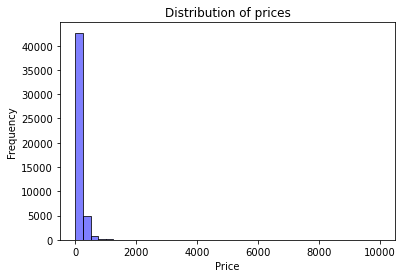

In [7]:
# Distribution of the price variable 
plt.figure(figsize=(6, 4))

sns.histplot(df.price, bins=40, color='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

**Answer:** The previous plot shows that the price variable has a long-tail distribution, so it could be recommended to apply a transformation such as a logaritmic one. 

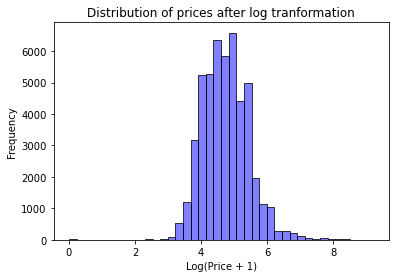

In [14]:
log_price = np.log1p(df.price)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

The previous plot shows how the price distribution looks normal, which is the desired output. 

## Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.

In [9]:
features = ['latitude', 'longitude', 'price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
df = df[features]
df.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Question 1
Find a feature with missing values. How many missing values does it have?

In [11]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Answer:** The feature `reviews_per_month` is the unique that has missing values with 10052 in total.

## Question 2

What's the median (50% percentile) for variable `minimum_nights`?

In [13]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Answer:** The median for `minimum_nights` is 3.0

## Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.

In [113]:
# Seet the random seed
np.random.seed(42)

# Define partitions sizes  
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# Shuffle indices 
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# Create sduffled partitions with defined sizes 
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [70]:
print(len(df_train), len(df_val), len(df_test))

29337 9779 9779


In [114]:
# Log normalization of target variable from all partitions 
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [115]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [116]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [117]:
# Fill missing values with mean 
# Calculate mean 
tr_mean = df_train.mean()

# Fill NAs of training and validation partitions with mean 
X_train_mean = df_train.fillna(tr_mean)
X_val_mean = df_val.fillna(tr_mean)

# Train LR model 
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

# Obtain predictions on the validation set 
y_pred_mean = w_0_mean + X_val_mean.dot(w_mean)

# RMSE
rmse_mean = round(rmse(y_val, y_pred_mean),2)

In [118]:
# Fill missing values with 0

# Fill NAs of training and validation partitions with 0 
X_train_zero = df_train.fillna(0)
X_val_zero = df_val.fillna(0)

# Train LR model 
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

# Obtain predictions 
y_pred_zero = w_0_zero + X_val_zero.dot(w_zero)

# RMSE
rmse_zero = round(rmse(y_val, y_pred_zero),2)

In [119]:
# RMSE of both models 
print(f'RMSE LR model filled NAs with mean: {rmse_mean}\nRMSE LR model filled NAs with 0: {rmse_zero}')

RMSE LR model filled NAs with mean: 0.64
RMSE LR model filled NAs with 0: 0.64


**Answer:** Considering 2 decimal places, the answers of both models were the same 

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [44]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [47]:
# Fill NAs of training and validation partitions with 0 
X_train_zero = df_train.fillna(0)
X_val_zero = df_val.fillna(0)

# Create reg array 
reg_array = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# Train LR models, predict on validation set, and calculate the RMSE for each model 
for r in reg_array:
    w_0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = w_0 + X_val_zero.dot(w)
    print(f'RMSE LR with reg {r}: {round(rmse(y_val, y_pred), 2)}')

RMSE LR with reg 0: 0.64
RMSE LR with reg 1e-06: 0.64
RMSE LR with reg 0.0001: 0.64
RMSE LR with reg 0.001: 0.64
RMSE LR with reg 0.01: 0.66
RMSE LR with reg 0.1: 0.68
RMSE LR with reg 1: 0.68
RMSE LR with reg 5: 0.68
RMSE LR with reg 10: 0.68


**Answer:** The best regularization coefficient would be 0. 

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [145]:
# Create random seed array 
seed_array = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_results = []

for i in seed_array:
    # Seet the random seed
    np.random.seed(i)
    
    # Define partitions sizes  
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    # Shuffle indices 
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    # Create sduffled partitions with defined sizes 
    df_train_temp = df_shuffled.iloc[:n_train].copy()
    df_val_temp = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test_temp = df_shuffled.iloc[n_train+n_val:].copy()

    # Log normalization of target variable from all partitions 
    y_train_temp = np.log1p(df_train_temp.price.values)
    y_val_temp = np.log1p(df_val_temp.price.values)
    y_test_temp = np.log1p(df_test_temp.price.values)

    del df_train_temp['price']
    del df_val_temp['price']
    del df_test_temp['price']
    
    # Fill NAs of training and validation partitions with 0 
    X_train_temp = df_train_temp.fillna(0)
    X_val_temp = df_val_temp.fillna(0)

    # Train LR model 
    w_0_temp, w_temp = train_linear_regression(X_train_temp, y_train)

    # Obtain predictions 
    y_pred_temp = w_0_temp + X_val_temp.dot(w_temp)

    # RMSE
    rmse_temp = round(rmse(y_val_temp, y_pred_temp),5)
    
    # Add RMSE to the results array 
    rmse_results.append(rmse_temp)

np_array_rmse = np.array(rmse_results)

std_rmse_results = round(np.std(np_array_rmse), 3)

print(f'RMSE LR standard deviation: {std_rmse_results}')

RMSE LR standard deviation: 0.008


**Answer:** The standard deviation was 0.008. 

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Train a model with `r=0.001`.
* What's the RMSE on the test dataset?

In [138]:
np.random.seed(9)

# Define partitions sizes  
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# Shuffle indices 
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# Create sduffled partitions with defined sizes 
df_train_def = df_shuffled.iloc[:n_train].copy()
df_val_def = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test_def = df_shuffled.iloc[n_train+n_val:].copy()

# Log normalization of target variable from all partitions 
y_train_def = np.log1p(df_train_def.price.values)
y_val_def = np.log1p(df_val_def.price.values)
y_test_def = np.log1p(df_test_def.price.values)

del df_train_def['price']
del df_val_def['price']
del df_test_def['price']

# Concatenate training and validation partitions 
df_full_training = pd.concat([df_train_def, df_val_def])
df_full_training = df_full_training.reset_index(drop=True)

# Fill NAs of full training and test partition with 0 
X_full_train = df_full_training.fillna(0)
X_test = df_test.fillna(0)

# Concatenate training and validation target values 
y_full_train = np.concatenate([y_train_def, y_val_def])

# Train LR model 
w_0_def, w_def = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# Obtain predictions 
y_pred_def = w_0_def + X_test.dot(w_def)

# RMSE
rmse_def = round(rmse(y_test, y_pred_def), 2)

print(f'RMSE LR final model: {rmse_def}')

RMSE LR final model: 0.65


**Answer:** The RMSE of the final model was 0.65